Only included because it's the only place that shows the shot noise and $\rho_{ax}$ worked out.

In [5]:
print 'importing modules...'

import subprocess
from numpy import loadtxt
import numpy as np

# from angular import bins
# from angular import d_a
# from angular import hubble
# from angular import window
# from angular import hubble_var

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

print 'DONE'

importing modules...
DONE


In [6]:
print 'setting constants...'

zmax = 4.5
numz = 301.
dz = zmax/(numz-1.)
z = np.arange(0,zmax+0.01,dz)
H0 = 67.7
omegam = 0.7
omegal = 1.-omegam
c = 2.998*np.power(10.,5)
A = 206.108
A2 = 159.399
sigmaz = 0.05*(1.+z)
shot = 0.00030462
fsky = 0.485

print 'DONE'

setting constants...
DONE


In [34]:
# print 'computing arrays...'
# zlist = bins(0.15,0.04547,3.5)
# zavg = [np.average(zlist[i]) for i in range(len(zlist))]
# da = d_a(z)*(1.+z)
# hz = hubble(z)
# wi = []
# nibar = []
# for i in range(len(zlist)):
#     wi.append(window(z,i)[0])
#     nibar.append(window(z,i)[1])

# wi2 = np.transpose(wi,(1,0))
# wi3 = []
# for i in range(301):
#     h1 = []
#     for j in range(30):
#         h2 = []
#         for e in range(30):
#             h2.append(wi2[i][j]*wi2[i][e])
#         h1.append(h2)
#     wi3.append(h1)

# print 'importing data...'
# k = [loadtxt('data/mp%s_k50.dat'%(i),unpack=True,usecols=[0]) for i in range(np.int(numz))]
# Pk = [loadtxt('data/mp%s_k50.dat'%(i),unpack=True,usecols=[1]) for i in range(np.int(numz))]
# k = k[::-1]
# Pk = Pk[::-1]
# Pk_dimless = [[Pk[i][j]*np.power(k[i][j],3.0)/(2.*np.square(np.pi)) for j in range(len(Pk[i]))] for i in range(len(Pk))]

# print 'constructing integrand...'
# hz = np.reshape(hz,(1,1,len(hz),1))
# da = np.reshape(da,(1,1,len(da),1))
# w = np.reshape(wi3,(30,30,301,1))
# k = np.reshape(k,(1,1,len(k),len(k[0])))
# Pk_dimless = np.reshape(Pk_dimless,(1,1,len(Pk_dimless),len(Pk_dimless[0])))
# m = hz*da*w*Pk_dimless
# print np.shape(m),np.shape(Pk_dimless)

# print 'DONE'

computing arrays...
importing data...
constructing integrand...
(30, 30, 301, 662) (1, 1, 301, 662)
DONE


# Testing Interpolation Methods

(662,) (662,)
(2998,)
(2998,)


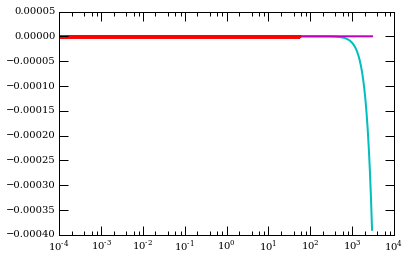

In [136]:
# scipy vs numpy interpolation comparison

from scipy.interpolate import CubicSpline
x = k[0][50]
y = m[0][50]
print np.shape(x),np.shape(y)
cs = CubicSpline(x,y)
npint = np.interp(lgoal,x,y)

for i in range(662):
    cs_single = CubicSpline(x[i],y[i])

plt.plot(lgoal,cs(lgoal),'c',lw = 2)
plt.plot(lgoal,npint,'m',lw = 2)
# plt.plot(x,y,'r.')
plt.xscale('log')
# plt.yscale('log')

In [4]:
# original interpolation method

print 'interpolating from k-space to ell-space...'
lreal = k*da
lgoal = np.arange(2,3000,1)
integrand = []
for i in range(len(m)):
    holder = []
    for j in range(len(m[i])):
        holder.append(np.interp(lgoal,lreal[0][j],m[i][j]))
    integrand.append(holder)
integrand = np.transpose(integrand,(0,2,1))

print 'integrating...'
pl = 2.*np.square(np.pi)/(c*np.power(lgoal,3))*np.trapz(integrand,z,dz,axis=2)

print 'DONE'

interpolating from k-space to ell-space...
integrating...
DONE


In [33]:
# alternative interpolation method -- now with scipy cubic spline

from scipy.interpolate import CubicSpline
lgoal = np.arange(2,3000,1)
lmat = np.zeros((301,2998))
for i in range(301):
    lmat[i] = lgoal

da2 = np.reshape(da,(301))
da2[0] = 0.0001
da2[1] = 0.0001

kmat = np.zeros((1,1,301,2998))
for i in range(301):
    kmat[0][0][i] = lmat[i]/da2[i]
print np.shape(kmat),np.shape(k),np.shape(m)

integrand2 = []
for i in range(30):
    h1 = []
    for e in range(30):
        h2 = []
        for j in range(301):
            spline = CubicSpline(k[0][0][j],m[i][e][j])
            h2.append(spline(kmat[0][0][j]))
        h1.append(h2)
    integrand2.append(h1)
print np.shape(integrand2)

pl2 = np.reshape(2.*np.square(np.pi)/(c*np.power(lgoal,3)),(1,1,2998))*np.trapz(integrand2,z,dz,axis=2)
print np.shape(pl2)

(30, 30, 2998)


In [165]:
# single ell interpolation w/ scipy cubic spline

print np.shape(k),np.shape(m),np.shape(kmat)
integrand3 = []

# for e in range(1):
#     h1 = []
#     for j in range(301):
#         print j
#         h2 = []
#         for i in range(2998):
#             spline = CubicSpline(k[0][j],m[e][j])
#             h2.append(spline(kmat[0][j][i]))
#         h1.append(h1)
#     integrand3.append(h1)
# print np.shape(integrand3)

print zlist[5],z[32]
int3 = []
for i in range(2998):
    spline = CubicSpline(k[0][32],m[5][32])
    int3.append(spline(kmat[0][32][i]))
print np.shape(int3)

pl3 = []
for i in range(2998):
    pl3.append(int3[i]*(2.*np.square(np.pi))/(c*np.power(lgoal[i],3)))

# pl3 = []
# for e in range(1):
#     h1 = []
#     for j in range(301):
#         h2 = []
#         for i in range(2998):
#             h2.append((2.*np.square(np.pi)/(c*np.power(lgoal[i],3)))*integrand3[j][i])
#         h1.append(h2)
#     pl3.append(h1)
# print np.shape(pl3)

(1, 301, 662) (30, 301, 662) (1, 301, 2998)
[0.44361606973582085, 0.5107843635874249] 0.48
(2998,)


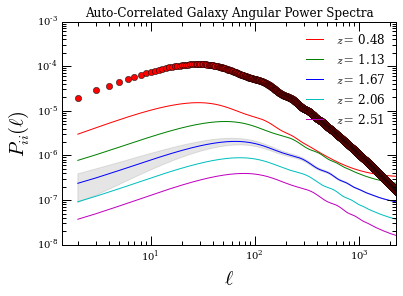

In [166]:
# Scipy cubic spline interpolation + single point scipy cubic spline interpolation

scale = [1.,1.,0.5,0.25,0.125]
color = ['r','g','b','c','m']
zlist_ints = [5,13,18,21,24]
lmax = [200,800,1600,2300,2300]
#lmax = np.repeat(3000,5)

for i in range(len(zlist_ints)):
    plt.loglog(lgoal,scale[i]*(pl2[zlist_ints[i]]+shot[i]),label = '$z =$ %s'%(round(zavg[zlist_ints[i]],2)),color = '%s'%(color[i]))
    if i == 2:
        plt.fill_between(lgoal,scale[i]*(pl2[zlist_ints[i]]-noise[zlist_ints[i]]+shot[i]),scale[i]*(pl2[zlist_ints[i]]+noise[zlist_ints[i]]+shot[i]),color = 'k',alpha = 0.1)
for i in range(2998):
    plt.plot(lgoal[i],pl3[i],'ro')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.4,2300)
#plt.xlim(1,3000)
plt.xlabel('$\ell$')
plt.ylabel('$P_{ii}(\ell)$')
plt.title(r'Auto-Correlated Galaxy Angular Power Spectra')
plt.legend(frameon = False,loc = 'upper right')

#interpolate at coarser and coarser intervals

In [104]:
# print np.shape(k),np.shape(m)
# xdata = k[0][32]
# ydata = m[5][32]
# print np.shape(xdata),np.shape(ydata)
# csdata = CubicSpline(xdata,ydata)
# m_ell = csdata(lgoal[98])
# print z[32]
# pre = 2.*np.square(np.pi)/(c*np.power(lgoal[98],3))
# plt.plot(k[0][32],pre*m[5][32])

In [109]:
# mask sorting method (in place of interpolation) -- wrong due to double counting

# import numpy.ma as mask
# print 'z shape = ',np.shape(z)
# print 'd_a(z) shape = ',np.shape(da)
# print 'k shape = ',np.shape(k)
# print 'm shape = ',np.shape(m)
# print 'lgoal shape = ',np.shape(lgoal)

# lreal = np.reshape(k*da,(301,662))
# print 'lreal shape = ',np.shape(lreal)

# lrange = np.transpose([lgoal-0.5,lgoal+0.5],(1,0))
# print np.shape(lrange)

# masked = []
# for i in range(2998):
#     h1 = []
#     for j in range(301):
#         h1.append(mask.masked_inside(lreal[j],lrange[i][0],lrange[i][1],copy=True))
#     masked.append(h1)
# print np.shape(masked)

z shape =  (301,)
d_a(z) shape =  (1, 301, 1)
k shape =  (1, 301, 662)
m shape =  (30, 301, 662)
lgoal shape =  (2998,)
lreal shape =  (301, 662)
(2998, 2)
(2998, 301, 662)


# Shot Noise and $\ell$ Limits

In [107]:
#print np.shape(nibar),nibar
#square_arcmin_per_steradian = 1.18181*np.power(10.,7)
#print square_arcmin_per_steradian
noise = np.sqrt((2*np.square(pl))/(fsky*(2.*lgoal+1.)))
nibar_norm = nibar*np.asarray(1.18181*np.power(10.,7))
shot = 1./nibar_norm
print np.shape(pl),np.shape(shot)
#currently using normalization A = 206.108 which is in units of galaxies/arcmin^2
#convert A to units of galaxies/steradian and then 1/nibar should be on the same scale as P(ell)

(30, 2998) (30,)


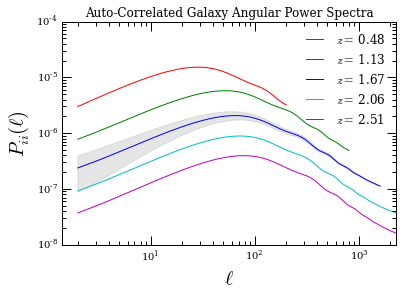

In [48]:
scale = [1.,1.,0.5,0.25,0.125]
color = ['r','g','b','c','m']
zlist_ints = [5,13,18,21,24]
lmax = [200,800,1600,2300,2300]
#lmax = np.repeat(3000,5)

for i in range(len(zlist_ints)):
    plt.loglog(lgoal[:lmax[i]],scale[i]*(pl[zlist_ints[i]][:lmax[i]]+shot[i]),label = '$z =$ %s'%(round(zavg[zlist_ints[i]],2)),color = '%s'%(color[i]))
    if i == 2:
        plt.fill_between(lgoal[:lmax[i]],scale[i]*(pl[zlist_ints[i]][:lmax[i]]-noise[zlist_ints[i]][:lmax[i]]+shot[i]),scale[i]*(pl[zlist_ints[i]][:lmax[i]]+noise[zlist_ints[i]][:lmax[i]]+shot[i]),color = 'k',alpha = 0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.4,2300)
#plt.xlim(1,3000)
plt.xlabel('$\ell$')
plt.ylabel('$P_{ii}(\ell)$')
plt.title(r'Auto-Correlated Galaxy Angular Power Spectra')
plt.legend(frameon = False,loc = 'upper right')
plt.savefig('plots/auto_pl.pdf')

# Axion Density Evolution

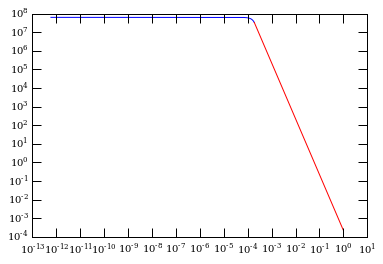

In [8]:
a,gr = np.loadtxt('grhoax',unpack = True,usecols = [0,1])
aosc = a[-1]
grosc = gr[-1]
a2 = np.arange(aosc,1.01,0.01)
gr2 = grosc*((aosc/a2)**3)
z = (1./a)-1.
z2 = (1./a2)-1.
plt.loglog(a,gr)
plt.loglog(a2,gr2,'r')

(10, 600)

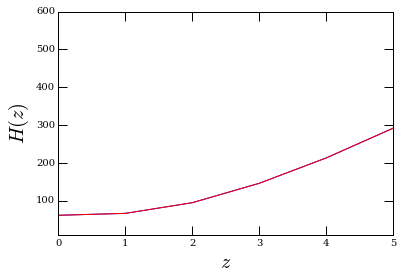

In [9]:
fv = [0.02225,0.1198,0.0001,10**-27,67.27,0.9645]
H0 = fv[4] #km/s/Mpc
h = H0/100.
zlong = np.arange(0.,10000.,1)
hubble_dm = hubble_var(zlong,True,fv[0],fv[1],fv[2],h)
hubble_de = hubble_var(zlong,False,fv[0],fv[1],fv[2],h)
zosc = (1./aosc)-1.

plt.plot(zlong,hubble_dm)
plt.plot(zlong,hubble_de,'r-')
plt.xlabel('$z$',size = 20)
plt.ylabel('$H(z)$',size = 20)
plt.xlim(0,5)
plt.ylim(10,600)

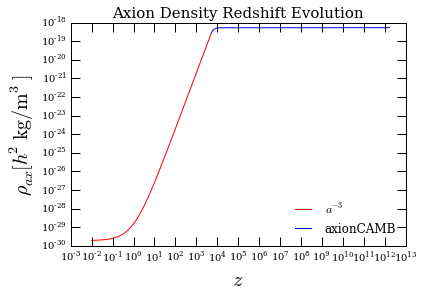

In [10]:
km_per_mpc = 3.086*10**19 #conversion factor to match units of H0 and G
H0 = fv[4] #km/s/Mpc
h = H0/100.
G = 0.0000000000667408
rho_crit = 3*np.square(H0/km_per_mpc)/(8*np.pi*G) #kg/m**3

omega_ax = rho_crit*fv[2]/np.square(h)
norm_ax = omega_ax/gr2[-1] #conversion factor from axionCAMB output to physical densities based on rho_crit
gr2_norm = gr2*norm_ax
gr_norm = gr*norm_ax

plt.loglog(z2,gr2_norm,'r',label = '$a^{-3}$')
plt.loglog(z,gr_norm,label = 'axionCAMB')
plt.xlabel('$z$',size = 20)
plt.ylabel(r'$\rho_{ax} [h^2 \rm{kg/m^3}]$',size = 20)
plt.title('Axion Density Redshift Evolution',size = 15)
plt.legend(frameon = False,loc = 'lower right')